<font size=6><b> Lec 06- Hedge and corr

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

import warnings
warnings.filterwarnings(action='ignore')

#-------------------- 차트 관련 속성 (한글처리, 그리드) -----------
#plt.rc('font', family='NanumGothicOTF') # For MacOS
plt.rcParams['font.family']= 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False
sns.set()

#-------------------- 주피터 , 출력결과 넓이 늘리기 ---------------
from IPython.core.display import display, HTML
display(HTML("<style>.container{width:100% !important;}</style>"))
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('max_colwidth', None)

In [5]:
DJ=pd.read_csv('./index_dataset/DJ.csv')
DJ.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590 entries, 0 to 589
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   날짜      590 non-null    object
 1   종가      590 non-null    object
 2   오픈      590 non-null    object
 3   고가      590 non-null    object
 4   저가      590 non-null    object
 5   거래량     590 non-null    object
 6   변동 %    590 non-null    object
dtypes: object(7)
memory usage: 32.4+ KB


In [13]:
def alphabet_handling(x):
    if 'B' in x:
        return str(float(x[:-1])*1000000000)
    elif 'K' in x:
        return str(float(x[:-1])*1000)
    elif 'M' in x:
        return str(float(x[:-1])*1000000)   
    else:
        return '' 
DJ['거래량']=DJ['거래량'].apply(lambda x : alphabet_handling(x))


In [14]:
DJ

,날짜,종가,오픈,고가,저가,거래량,변동 %
0,2022년 3월,"34,707.15","33,813.48","34,876.87","32,578.73",,2.44%
1,2022년 2월,"33,879.55","35,151.47","35,824.28","32,284.35",2500000000.0,-3.56%
2,2022년 1월,"35,131.86","36,321.59","36,952.65","33,150.33",8900000000.0,-3.32%
3,2021년 12월,"36,338.30","34,678.94","36,679.44","34,006.98",8410000000.0,5.38%
4,2021년 11월,"34,483.72","35,833.65","36,565.73","34,424.44",7230000000.0,-3.73%
...,...,...,...,...,...,...,...
585,1980년 5월,850.85,817.06,866.13,795.81,,4.14%
586,1980년 4월,817.06,785.75,818.52,751.37,,3.98%
587,1980년 3월,785.75,863.14,868.69,729.95,,-8.97%
588,1980년 2월,863.14,875.84,918.17,847.27,,-1.45%


## 변동%

In [16]:
DJ=DJ.rename({'변동 %':'변동'},axis=1)
DJ['변동']=DJ['변동'].str.replace('%','').astype('float')
DJ.head()

,날짜,종가,오픈,고가,저가,거래량,변동
0,2022년 3월,"34,707.15","33,813.48","34,876.87","32,578.73",,2.44
1,2022년 2월,"33,879.55","35,151.47","35,824.28","32,284.35",2500000000.0,-3.56
2,2022년 1월,"35,131.86","36,321.59","36,952.65","33,150.33",8900000000.0,-3.32
3,2021년 12월,"36,338.30","34,678.94","36,679.44","34,006.98",8410000000.0,5.38
4,2021년 11월,"34,483.72","35,833.65","36,565.73","34,424.44",7230000000.0,-3.73


## 날짜

In [18]:
DJ['날짜']=pd.to_datetime(DJ['날짜'], format="%Y년 %m월")
DJ.head()

,날짜,종가,오픈,고가,저가,거래량,변동
0,2022-03-01,"34,707.15","33,813.48","34,876.87","32,578.73",,2.44
1,2022-02-01,"33,879.55","35,151.47","35,824.28","32,284.35",2500000000.0,-3.56
2,2022-01-01,"35,131.86","36,321.59","36,952.65","33,150.33",8900000000.0,-3.32
3,2021-12-01,"36,338.30","34,678.94","36,679.44","34,006.98",8410000000.0,5.38
4,2021-11-01,"34,483.72","35,833.65","36,565.73","34,424.44",7230000000.0,-3.73


## 공통함수로

In [61]:
file_list = os.listdir("./dataset/lec06_index_dataset/")
# 내부 파일 목록 출력
os.listdir("./dataset/lec06_index_dataset/")

['DJ.csv',
 'EXUS.csv',
 'GLD.csv',
 'KOSPI.csv',
 'NASDAQ.csv',
 'S&P500.csv',
 'SHY.csv',
 'TLT.csv']

In [60]:
os.path.basename('DJ.csv')

'DJ.csv'

In [62]:
def alphabet_handling(x):
    res = 0
    if 'B' in x:
        res = float(x[:-1])*1000000000
    elif 'K' in x:
        res = float(x[:-1])*1000
    elif 'M' in x:
        res = float(x[:-1])*1000000
    else:
        res = 0 
    return res

file_list = os.listdir("./dataset/lec06_index_dataset/")
for file in file_list:
    try :
        fname = os.path.basename(file).rstrip('.csv')  #DJ.csv  --> DJ
        print(fname)
        df = pd.read_csv(f"./dataset/lec06_index_dataset/{fname}.csv", thousands=",")
        
        try :
            df['거래량']=df['거래량'].apply(lambda x : alphabet_handling(x))
        except :
            pass
        
        df = df.rename({"변동 %":"변동률"}, axis=1)
        df['변동률'] = df['변동률'].str.replace("%","").astype('float')

        df['날짜'] = pd.to_datetime(df['날짜'], format='%Y년 %m월')  #infer_datetime_format=True)
        df = df.set_index("날짜")
        globals()[file] = df    #globals()[키=파일이름]=값  DJ = df 
        print(df.tail())
    except :
        continue

DJ
                종가      오픈      고가      저가  거래량   변동률
날짜                                                   
1980-05-01  850.85  817.06  866.13  795.81  0.0  4.14
1980-04-01  817.06  785.75  818.52  751.37  0.0  3.98
1980-03-01  785.75  863.14  868.69  729.95  0.0 -8.97
1980-02-01  863.14  875.84  918.17  847.27  0.0 -1.45
1980-01-01  875.85  838.74  897.88  809.05  0.0  4.42
EXUS
                종가      오픈      고가      저가   변동률
날짜                                              
1981-09-01  681.25  681.25  681.25  681.25 -0.96
1981-08-01  687.85  687.85  687.85  687.85  0.13
1981-07-01  686.95  686.95  686.95  686.95  0.55
1981-06-01  683.20  683.20  683.20  683.20 -0.18
1981-05-01  684.40  684.40  684.40  684.40  0.81
GLD
               종가     오픈     고가     저가         거래량   변동률
날짜                                                      
2005-04-01  43.35  42.60  43.70  42.16  38430000.0  1.24
2005-03-01  42.82  43.30  44.67  42.35  41040000.0 -1.61
2005-02-01  43.52  42.09  43.74  41.02 

## API로 불러오기

In [65]:
import yfinance as yf
import FinanceDataReader as fdr
from pandas_datareader import data as pdr
yf.pdr_override()

In [66]:
INDEX_NAME = ["SPY", "^GSPC", "SHY","^KS11", "TLT", "GLD", "DJI",'USDKRW=X']   #미'USDKRW=X' 일'JPYKRW=X' 영'GBPKRW=X'
sdate='1980-01-01'
edate='2022-03-25'

dict={}
for index in INDEX_NAME:
    df=pdr.get_data_yahoo(index,start=sdate)
    dict[index]=df['Adj Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [67]:
df = pd.DataFrame(dict)
# df.columns =  ["SPY", "GSPC", "SHY","KS11", "TLT", "GLD", "DJI",'USDKRW']
df.columns =  ["NASDAQ", "S&P500", "BOND-S","KOSPI", "BOND-G", "GLD", "DJ",'US-W']
df.head()

,NASDAQ,S&P500,BOND-S,KOSPI,BOND-G,GLD,DJ,US-W
Date,,,,,,,,
1979-12-31,NaN,107.940002,NaN,NaN,NaN,NaN,838.739990,NaN
1980-01-02,NaN,105.760002,NaN,NaN,NaN,NaN,824.570007,NaN
1980-01-03,NaN,105.220001,NaN,NaN,NaN,NaN,820.309998,NaN
1980-01-04,NaN,106.519997,NaN,NaN,NaN,NaN,828.840027,NaN
1980-01-07,NaN,106.809998,NaN,NaN,NaN,NaN,832.000000,NaN


## 지수화

In [70]:
df=df.dropna(axis=0)
df2=df.pct_change(1)
df2=df2.dropna(axis=0)
df2.head()

,NASDAQ,S&P500,BOND-S,KOSPI,BOND-G,GLD,DJ,US-W
Date,,,,,,,,
2004-11-19,-0.011117,-0.011161,-0.001590,-0.010059,-0.007980,0.009013,-0.010934,-0.007533
2004-11-22,0.004769,0.005896,0.000245,-0.019653,0.005211,0.003796,0.003108,-0.025901
2004-11-23,0.001526,-0.000255,-0.000122,0.012247,0.001240,-0.004449,0.000305,0.027564
2004-11-24,0.002370,0.004095,-0.000123,0.014133,0.000000,0.006704,0.002640,0.010900
2004-11-26,-0.000760,0.000753,-0.000981,-0.016549,-0.006529,0.005327,0.000181,-0.018097


In [45]:
df2.index.min(), df2.index.max()

(Timestamp('2004-11-18 00:00:00'), Timestamp('2022-03-02 00:00:00'))

<AxesSubplot:>

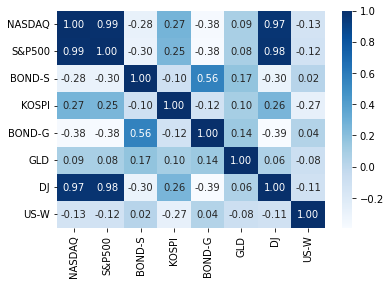

In [46]:
df=df.dropna(axis=0)
sns.heatmap(df2.corr(),annot=True,fmt='.2f',cmap='Blues')

* 환율이 오르면 국내 주가하락(원화가치 하락, 투자가치 떨어진다.)
* KOSPI 와 BOND-S/G는 약한 음의 상관관계
* 환과 관련된 레버리지 상품을 추천
* 비추- KOSPI와 같은 주가상품(NASDAQ, DJ, S&P)
* 원화와 달러 함께 운용하는게 유리

## 금융 시장 상황에 따른 자산별 상관관계

<AxesSubplot:xlabel='Date'>

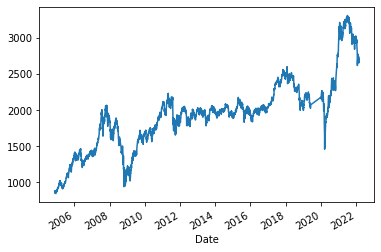

In [56]:
df['KOSPI'].plot()

## 금융 시장 현황에 따른 자산별 상관관계

<AxesSubplot:xlabel='Date'>

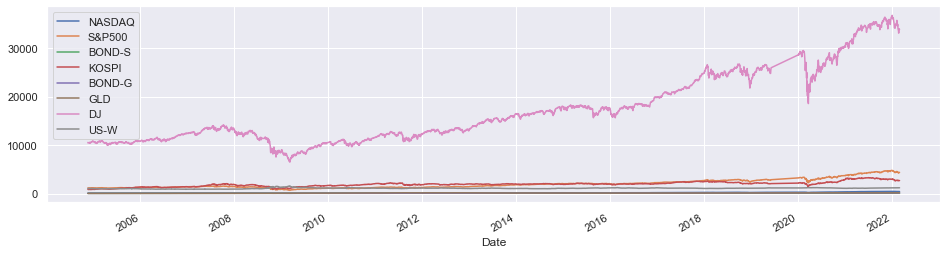

In [71]:
df.plot(figsize=(16,4))

<AxesSubplot:xlabel='Date'>

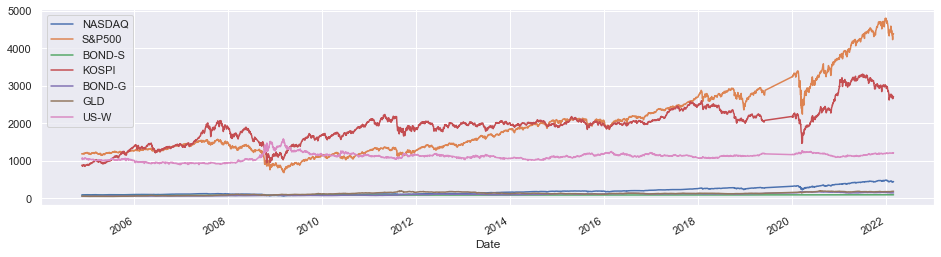

In [72]:
df[['NASDAQ', 'S&P500', 'BOND-S', 'KOSPI', 'BOND-G', 'GLD', 'US-W']].plot(figsize=(16,4))

<AxesSubplot:xlabel='Date'>

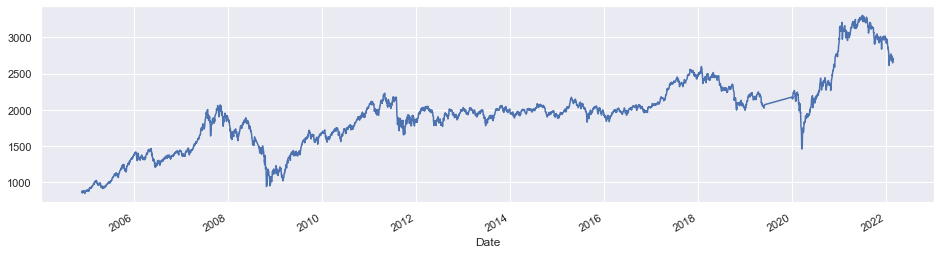

In [73]:
df['KOSPI'].plot(figsize=(16,4))